# 1. K-means 

## 1.1. Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Import data blob from scikit-learn
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array([[ 0.2,  2.3],
                        [-1.5 ,  2.3],
                        [-2.8,  1.8],
                        [-2.8,  2.8],
                        [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
# X: generated samples (coor in Oxy w (x0, y0))
# y: integer labels for cluster membership of each sample 
X,y = make_blobs(n_samples=500, centers=blob_centers,
                cluster_std=blob_std, random_state=42)
y[:10]

array([3, 3, 2, 0, 2, 3, 4, 4, 2, 2])

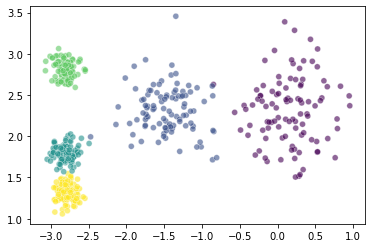

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# color = tuple int -> other cluster has other color 
sns.scatterplot(X[:, 0], X[:, 1], c = y, alpha=0.6);

## 1.2. K-Means 

In [6]:
from sklearn.cluster import KMeans

# Init k-cluster
k_init = 5 
kmeans = KMeans(n_clusters=k_init)

In [7]:
# Fit & Predict 
y_pred = kmeans.fit_predict(X)

# First 10 predictor
y_pred[:10]

array([3, 3, 4, 2, 4, 3, 0, 0, 4, 4], dtype=int32)

In [8]:
# Predict new data 
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

In [9]:
# In the KMeans class, the transform() method measures the distance from each instance to every centroid (from 1,2,3...)
kmeans.transform(X_new)

array([[2.87073952, 1.48015431, 0.35103375, 2.92200001, 2.80912045],
       [5.8279534 , 4.45674098, 2.853046  , 5.8637849 , 5.80503661],
       [1.70038749, 1.69716212, 3.23816719, 0.27076141, 1.22680656],
       [1.20593689, 1.56517294, 3.16956658, 0.36435323, 0.73787522]])

In [10]:
# Score by inertia - mean squared distance between each instance and its closest centroid
print(kmeans.inertia_)

# score() method returns the negative inertia, bcs it always respect the "great is better" rule
print(kmeans.score(X))

49.02812479675544
-49.028124796755435


## 1.3. Mini-batch K-Means

* `Online K-means` help us to cluster big/stream data, follow online learning & SGD (stochastic GD)

* Instead of using the full dataset at each iteration (epoch), the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration.

In [11]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [12]:
# Score
minibatch_kmeans.score(X)

-49.35919653085283

# 2. Applications

## 2.1. Image segmentation (Color)

In [15]:
from matplotlib.image import imread # you could also use `imageio.imread()`
image = imread("/Users/charles/MLE/MLA/Image/59561356_1019528674908819_4737101653335867392_n.jpg")
image.shape

(1152, 2048, 3)

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means.For example, it may identify a color cluster for all shades of green. Next, for each color (e.g., dark green), it looks for the mean color of the pixel’s color cluster. For example, all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green). Finally it reshapes this long list of colors to get the same shape as the original image

In [38]:
# X = image.reshape(-1,3)
# K-Means 
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


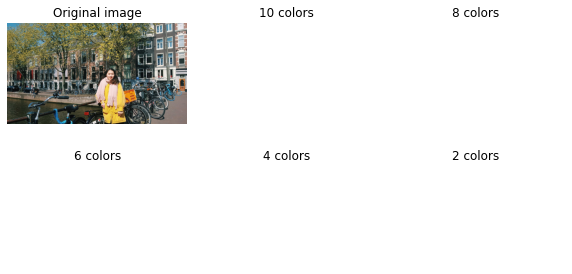

In [42]:

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show();

## 2.2. Preprocessing 
Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. For example, let’s tackle the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.


### Logistics Regression (not preprocessing)

In [44]:
# Load data
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [45]:
# Spilit data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [46]:
# Logistics model 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [51]:
# Score
log_reg.score(X_test, y_test)

0.9733333333333334

### Pipeline Kmeans 


In [56]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg', LogisticRegression())])

In [63]:
pipeline.score(X_test, y_test)

0.9688888888888889